In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from random import random
import math
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn import preprocessing
from tensorflow.keras.optimizers import Adam
from keras_gradient_noise import add_gradient_noise
#from keras import adam

Using TensorFlow backend.


In [6]:
import keras
keras.__version__

'2.2.4'

In [7]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
model.add(Dense(1, activation='linear'))
model.add(Dense(1, activation='linear'))
#model.add(Dense(1, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [11]:
train_x = [[random()*math.pi] for i in range(10)]
train_y = [[math.sin(x[0])] for x in train_x]

In [12]:
#NoisyAdam = add_gradient_noise(tf.keras.optimizers.Adam)
#model.compile(optimizer=NoisyAdam())

In [14]:
model.compile(loss='mse', optimizer="adam", metrics=['accuracy'])
model.fit(np.array(train_x), np.array(train_y), epochs=30, verbose=False)

In [15]:
model.predict(np.array(train_x))[:10]-train_y[:10]

array([[ 0.18684443],
       [ 0.32822429],
       [-0.30772303],
       [-0.29076455],
       [-0.01380589],
       [ 0.08521217],
       [ 0.5449614 ],
       [-0.05976458],
       [ 0.00609259],
       [-0.4739127 ]])

In [57]:
import math

def func_cos(x, n):
    cos_approx = 0
    coeffs= []
    for i in range(n):
        coef = (-1)**i
        num = x**(2*i)
        denom = math.factorial(2*i)
        cos_approx += ( coef ) * ( (num)/(denom) )
        coeffs.append(coef/denom)
    
    return cos_approx,coeffs

In [102]:
in1 = tf.keras.layers.Input(shape=(1,))

#input2 = keras.layers.Input(shape=(1,))
#x2 = keras.layers.Dense(8, activation='relu')(input2)
# equivalent to added = keras.layers.add([x1, x2])
x1 = tf.keras.layers.Dense(1, kernel_initializer='random_uniform', bias_initializer='random_uniform', activation='linear')(in1)
lay1 = tf.keras.layers.multiply([x1, in1])

x2 = tf.keras.layers.Dense(1, kernel_initializer='ones', bias_initializer='random_uniform',activation='linear')(lay1)
lay2 = tf.keras.layers.multiply([x2, in1])

x3 = tf.keras.layers.Dense(1,kernel_initializer='ones', bias_initializer='random_uniform',activation='linear')(lay2)
lay3 = tf.keras.layers.multiply([x3, in1])

x4 = tf.keras.layers.Dense(1,kernel_initializer='ones', bias_initializer='random_uniform',activation='linear')(lay3)
lay4 = tf.keras.layers.multiply([x4, in1])

out = tf.keras.layers.Dense(1,activation='linear')(lay4)
#x2 = keras.layers.Dense(1,activation='linear')(input1*x1)
model = tf.keras.models.Model(inputs=in1, outputs=out)

In [103]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense_30 (Dense)                (None, 1)            2           input_12[0][0]                   
__________________________________________________________________________________________________
multiply_28 (Multiply)          (None, 1)            0           dense_30[0][0]                   
                                                                 input_12[0][0]                   
__________________________________________________________________________________________________
dense_31 (Dense)                (None, 1)            2           multiply_28[0][0]          

In [47]:
from tensorflow.keras.layers import Layer
class Bias(Layer):
    """y = w.x + b"""

    def __init__(self, units=32, input_dim=32):
        super(Bias, self).__init__()
        w_init = tf.random_uniform_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(input_dim, units), dtype='float32'),
            trainable=True)
        b_init = tf.random_uniform_initializer()
        self.b = tf.Variable(
            initial_value=b_init(shape=(units,), dtype='float32'),
            trainable=True)

def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [48]:
in1 = tf.keras.layers.Input(shape=(1,))

#input2 = keras.layers.Input(shape=(1,))
#x2 = keras.layers.Dense(8, activation='relu')(input2)
# equivalent to added = keras.layers.add([x1, x2])
#y1 = tf.keras.layers.Dense(1, kernel_initializer='random_uniform', bias_initializer='random_uniform', activation='linear')(in1)
y1 = Bias(1,1)(in1)
nlay1 = tf.keras.layers.multiply([y1, in1])

y2 = Bias(1,1)(nlay1)
nlay2 = tf.keras.layers.multiply([y2, in1])

y3 = Bias(1,1)(nlay2)
nlay3 = tf.keras.layers.multiply([y3, in1])

#x4 = keras.layers.Dense(1,kernel_initializer='ones', bias_initializer='random_uniform',activation='linear')(lay3)
#lay4 = keras.layers.multiply([x4, in1])

out =  tf.keras.layers.Dense(1, kernel_initializer='random_uniform', 
                             bias_initializer='random_uniform', activation='linear')(nlay3)
#out = Bias(1,1)(nlay3)
#x2 = keras.layers.Dense(1,activation='linear')(input1*x1)
nmodel = tf.keras.models.Model(inputs=in1, outputs=out)

In [49]:
nmodel.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
bias_12 (Bias)                  (None, 1)            2           input_8[0][0]                    
__________________________________________________________________________________________________
multiply_13 (Multiply)          (None, 1)            0           bias_12[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
bias_13 (Bias)                  (None, 1)            2           multiply_13[0][0]          

In [50]:
train_x = [[2*random()*math.pi] for i in range(100)]
train_y = [[math.cos(x[0])] for x in train_x]

In [65]:
nmodel.compile(loss='mse', optimizer='nadam', metrics=['accuracy'])
nmodel.fit(np.array(train_x), np.array(train_y), epochs=10, verbose=False)

W0216 13:48:21.193745 4700079552 optimizer_v2.py:1029] Gradients do not exist for variables ['Variable:0', 'Variable:0', 'Variable:0', 'Variable:0', 'Variable:0', 'Variable:0'] when minimizing the loss.
W0216 13:48:21.338303 4700079552 optimizer_v2.py:1029] Gradients do not exist for variables ['Variable:0', 'Variable:0', 'Variable:0', 'Variable:0', 'Variable:0', 'Variable:0'] when minimizing the loss.


In [66]:
nmodel.get_weights()

[array([[0.04724411]], dtype=float32),
 array([0.00677318], dtype=float32),
 array([[-0.04033785]], dtype=float32),
 array([-0.01625122], dtype=float32),
 array([[-0.01448733]], dtype=float32),
 array([-0.02033181], dtype=float32),
 array([[-0.01547188]], dtype=float32),
 array([-0.11310187], dtype=float32)]

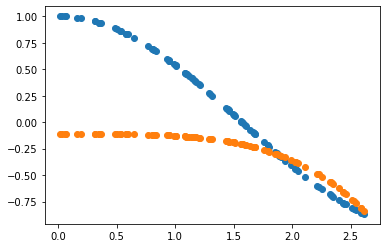

In [67]:
plt.plot(train_x,train_y,'o')
plt.plot(train_x,nmodel.predict(np.array(train_x)),'o')

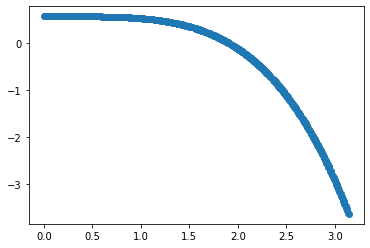

In [181]:
test_x = [[random()*math.pi] for i in range(1000)]
test_y = [nmodel.predict(x) for x in test_x]
plt.plot(test_x,[y[0] for y in test_y],'o')

In [101]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.fit(np.array(train_x), np.array(train_y), epochs=10, verbose=True)

Train on 100 samples
Epoch 1/10
100/100 [==============================] - 0s 4ms/sample - loss: nan - accuracy: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 0s 84us/sample - loss: nan - accuracy: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 0s 82us/sample - loss: nan - accuracy: 0.0000e+00
Epoch 4/10
100/100 [==============================] - 0s 75us/sample - loss: nan - accuracy: 0.0000e+00
Epoch 5/10
100/100 [==============================] - 0s 79us/sample - loss: nan - accuracy: 0.0000e+00
Epoch 6/10
100/100 [==============================] - 0s 74us/sample - loss: nan - accuracy: 0.0000e+00
Epoch 7/10
100/100 [==============================] - 0s 81us/sample - loss: nan - accuracy: 0.0000e+00
Epoch 8/10
100/100 [==============================] - 0s 77us/sample - loss: nan - accuracy: 0.0000e+00
Epoch 9/10
100/100 [==============================] - 0s 74us/sample - loss: nan - accuracy: 0.0000e+00
Epoch 10/10
100/100 [=======================

In [108]:
[model.predict(x)[0] for x in test_x]

[array([-57.227505], dtype=float32),
 array([-83.323166], dtype=float32),
 array([-378.06097], dtype=float32),
 array([-12.596513], dtype=float32),
 array([-71.548294], dtype=float32),
 array([-367.35968], dtype=float32),
 array([-180.3069], dtype=float32),
 array([-566.0719], dtype=float32),
 array([-107.859375], dtype=float32),
 array([-111.932434], dtype=float32),
 array([-2.5890534], dtype=float32),
 array([-108.11266], dtype=float32),
 array([-433.34763], dtype=float32),
 array([-293.8367], dtype=float32),
 array([-538.69885], dtype=float32),
 array([-43.416553], dtype=float32),
 array([-39.573383], dtype=float32),
 array([-86.364586], dtype=float32),
 array([-3.4390895], dtype=float32),
 array([-21.532728], dtype=float32),
 array([-577.13275], dtype=float32),
 array([-217.70926], dtype=float32),
 array([-327.54816], dtype=float32),
 array([-15.364233], dtype=float32),
 array([-3.2520888], dtype=float32),
 array([-16.982193], dtype=float32),
 array([-14.427876], dtype=float32),
 a

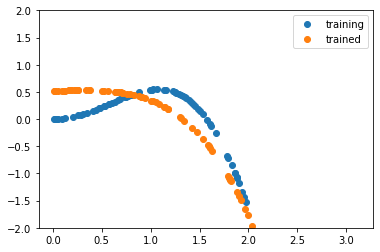

In [112]:
train_x = [[random()*math.pi] for i in range(100)]
train_y = [[math.cos(x[0])*(x[0]**2)] for x in train_x]
model.compile(loss='mse', optimizer='nadam', metrics=['accuracy'])
model.fit(np.array(train_x), np.array(train_y), epochs=1000, verbose=False)
test_x = [[random()*math.pi] for i in range(100)]
plt.plot(train_x,train_y,'o',label='training')
#plt.plot(test_x,[math.cos(x[0]) for x in test_x],'o',label='exact')
#plt.plot(test_x,[func_cos(x[0],3)[0] for x in test_x],'o', label='Taylor')
plt.plot(test_x,[model.predict(x)[0] for x in test_x],'o',label='trained')
plt.legend(loc="upper right")
plt.ylim(-2, 2.0)
plt.show()

In [549]:
weights = model.layers[-7].get_weights()[0]
weights

array([[-0.11394488]], dtype=float32)

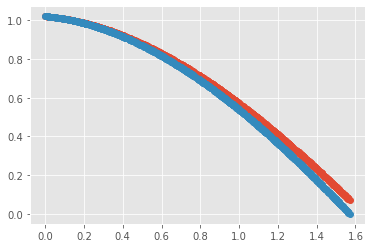

In [525]:
plt.plot(test_x,[-0.572*x[0]*(1.01*x[0]*(-0.102*x[0]+0.731)+0.153)+1.021 for x in test_x], "o")
plt.plot(test_x,[model.predict(x)[0] for x in test_x],'o',label='trained')

In [72]:
import sklearn
from sklearn

In [78]:
n = 5
poly = sklearn.preprocessing.PolynomialFeatures(degree=n)
x_poly = poly.fit_transform(np.array(train_x).reshape(-1,1))

In [79]:
poly_model = Sequential([Dense(units=1, input_shape=[n+1])])
poly_optimizer = tf.keras.optimizers.Adam(lr=1e-3)
poly_model.compile(optimizer=poly_optimizer, loss='mse')
history = poly_model.fit(x_poly, np.array(train_y), epochs=100, verbose=False)

In [80]:
mse = history.history['loss'][-1]
y_result = poly_model.predict(x_poly)

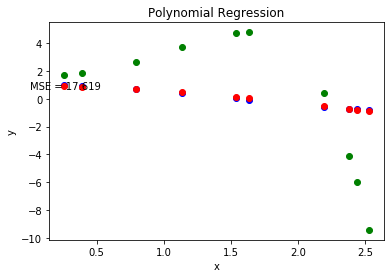

In [81]:
plt.title('Polynomial Regression')
plt.plot(x_poly[:, 1], train_y,'o',color = 'blue')
plt.plot(x_poly[:, 1], poly_model.predict(x_poly),'o', color = 'green')
plt.plot(x_poly[:, 1], model.predict(np.array([[x] for x in x_poly[:, 1]])),'o', color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.text(0,0.70,'MSE = {:.3f}'.format(mse))
plt.show()